In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
iris = load_iris()
X = iris.data
y = iris.target


In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []

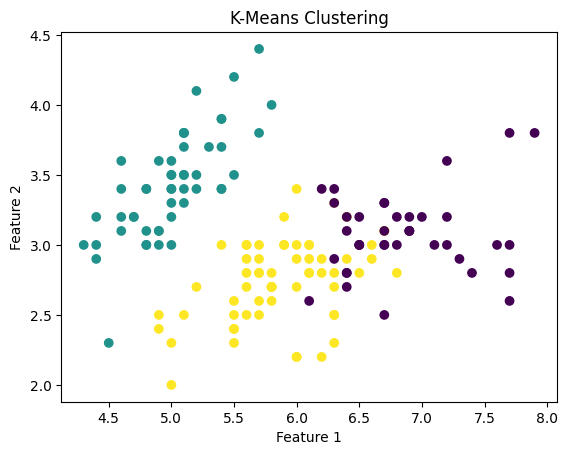

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [18]:
inertias = []
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, km.labels_))

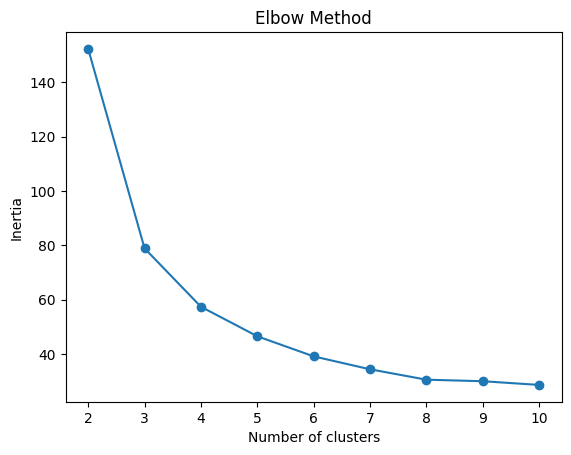

In [19]:
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

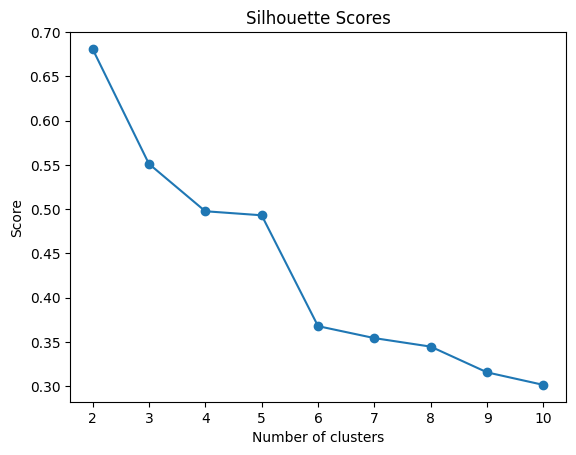

In [20]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()


In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


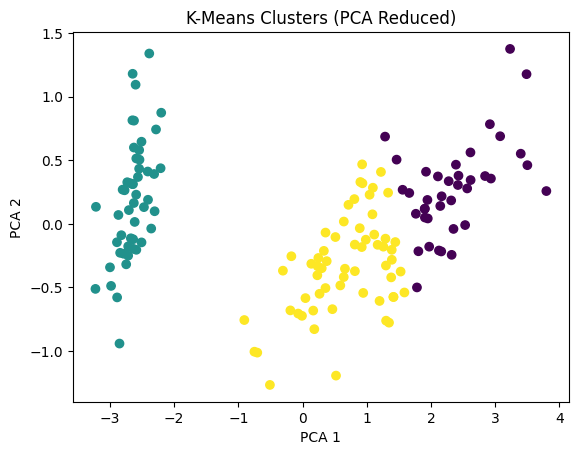

In [22]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


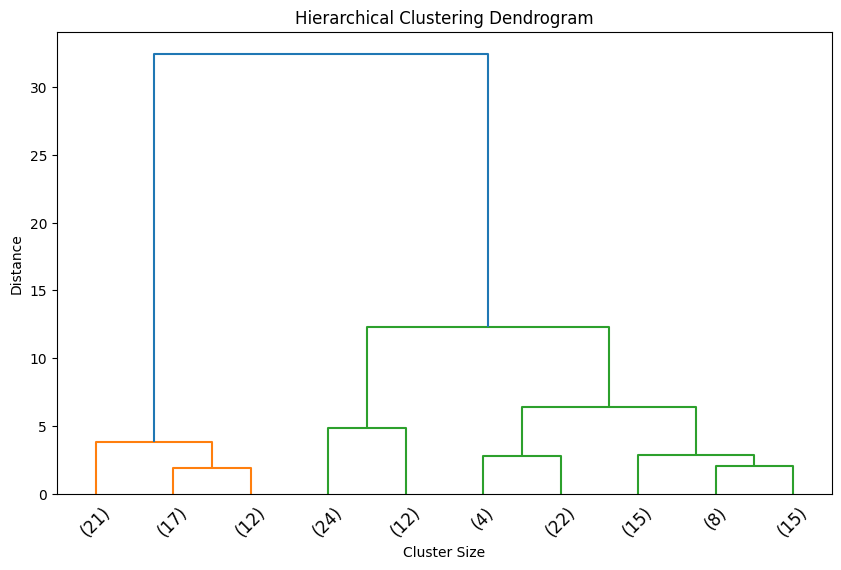

In [23]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [24]:
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X)

In [25]:
conf_matrix_kmeans = confusion_matrix(y, y_kmeans)
conf_matrix_agg = confusion_matrix(y, y_agg)

In [27]:
row_ind, col_ind = linear_sum_assignment(-conf_matrix_kmeans)
acc_kmeans = conf_matrix_kmeans[row_ind, col_ind].sum() / conf_matrix_kmeans.sum()

row_ind, col_ind = linear_sum_assignment(-conf_matrix_agg)
acc_agg = conf_matrix_agg[row_ind, col_ind].sum() / conf_matrix_agg.sum()

print(f"K-Means Accuracy: {acc_kmeans:.4f}")
print(f"Agglomerative Clustering Accuracy: {acc_agg:.4f}")

K-Means Accuracy: 0.8867
Agglomerative Clustering Accuracy: 0.8933
